# Visualizing stock data

Display data of last 30 days

In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.dates as mdates
from matplotlib import pyplot as plt
from alpha_vantage.timeseries import TimeSeries
from currency_converter import CurrencyConverter

In [2]:
API_KEY = "SEOC47M8VXQBHO41"
symbols = ["DIS"]

### Fetch daily stock data

In [3]:
class Data:

	def __init__(self, key, symbols):
		"""Initialize variables and Alpha Vantage API 
		"""
		self.API_KEY = key
		self.symbols = symbols
		self.timeseries = TimeSeries(key=self.API_KEY, output_format="pandas")
		self.fetch()

	def fetch(self):
		"""Fetch data from TimeSeries object
		"""
		self.data, self.meta = self.timeseries.get_daily(symbol=self.symbols[0], outputsize="compact")
		print(self.data)

In [4]:
d = Data(API_KEY, symbols)

            1. open   2. high    3. low  4. close   5. volume
date                                                         
2020-11-10  139.970  142.3700  137.6700    142.11  18115410.0
2020-11-09  140.260  147.6800  138.0650    142.59  35634684.0
2020-11-06  126.255  128.0400  124.6147    127.46   6259697.0
2020-11-05  126.780  128.6200  125.8000    126.96   7654761.0
2020-11-04  123.580  126.8600  123.4100    125.07   7483043.0
...             ...       ...       ...       ...         ...
2020-06-26  110.950  111.2000  108.0221    109.10  15256468.0
2020-06-25  108.990  111.5100  108.5000    111.36  17222391.0
2020-06-24  115.850  116.0000  110.0300    112.07  22227061.0
2020-06-23  116.960  117.4500  115.9700    116.59  10180185.0
2020-06-22  114.190  116.1925  113.1100    115.92  12845639.0

[100 rows x 5 columns]


### Sort index and reduce to last 20 workdays

In [5]:
t1 = datetime.date.today()
t0 = t1 - datetime.timedelta(days=180)

In [6]:
d.data = d.data.sort_index()
d.data = d.data[t0:t1]
d.data

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-06-22,114.190,116.1925,113.1100,115.92,12845639.0
2020-06-23,116.960,117.4500,115.9700,116.59,10180185.0
2020-06-24,115.850,116.0000,110.0300,112.07,22227061.0
2020-06-25,108.990,111.5100,108.5000,111.36,17222391.0
2020-06-26,110.950,111.2000,108.0221,109.10,15256468.0
...,...,...,...,...,...
2020-11-04,123.580,126.8600,123.4100,125.07,7483043.0
2020-11-05,126.780,128.6200,125.8000,126.96,7654761.0
2020-11-06,126.255,128.0400,124.6147,127.46,6259697.0


### Get list of timesteps

In [7]:
timesteps = d.data.index.to_list()

for index, value in enumerate(timesteps):
    timesteps[index] = str(datetime.datetime.strptime(str(value), '%Y-%m-%d %H:%M:%S').date())[5:]

timesteps

['06-22',
 '06-23',
 '06-24',
 '06-25',
 '06-26',
 '06-29',
 '06-30',
 '07-01',
 '07-02',
 '07-06',
 '07-07',
 '07-08',
 '07-09',
 '07-10',
 '07-13',
 '07-14',
 '07-15',
 '07-16',
 '07-17',
 '07-20',
 '07-21',
 '07-22',
 '07-23',
 '07-24',
 '07-27',
 '07-28',
 '07-29',
 '07-30',
 '07-31',
 '08-03',
 '08-04',
 '08-05',
 '08-06',
 '08-07',
 '08-10',
 '08-11',
 '08-12',
 '08-13',
 '08-14',
 '08-17',
 '08-18',
 '08-19',
 '08-20',
 '08-21',
 '08-24',
 '08-25',
 '08-26',
 '08-27',
 '08-28',
 '08-31',
 '09-01',
 '09-02',
 '09-03',
 '09-04',
 '09-08',
 '09-09',
 '09-10',
 '09-11',
 '09-14',
 '09-15',
 '09-16',
 '09-17',
 '09-18',
 '09-21',
 '09-22',
 '09-23',
 '09-24',
 '09-25',
 '09-28',
 '09-29',
 '09-30',
 '10-01',
 '10-02',
 '10-05',
 '10-06',
 '10-07',
 '10-08',
 '10-09',
 '10-12',
 '10-13',
 '10-14',
 '10-15',
 '10-16',
 '10-19',
 '10-20',
 '10-21',
 '10-22',
 '10-23',
 '10-26',
 '10-27',
 '10-28',
 '10-29',
 '10-30',
 '11-02',
 '11-03',
 '11-04',
 '11-05',
 '11-06',
 '11-09',
 '11-10']

### Convert currency from USD to EUR

In [8]:
converter = CurrencyConverter()

for column in d.data:
    for index, value in enumerate(d.data[column]):
        d.data[column].iloc[index] = round(converter.convert(value, "USD", "EUR"), 2)

d.data

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-06-22,98.00,99.72,97.07,99.49,11024406.97
2020-06-23,100.38,100.80,99.53,100.06,8736856.33
2020-06-24,99.42,99.55,94.43,96.18,19075747.51
2020-06-25,93.54,95.70,93.12,95.57,14780630.79
2020-06-26,95.22,95.43,92.71,93.63,13093432.89
...,...,...,...,...,...
2020-11-04,106.06,108.87,105.91,107.34,6422110.37
2020-11-05,108.81,110.38,107.96,108.96,6569482.49
2020-11-06,108.35,109.89,106.95,109.39,5372208.20


# Plot open, close, high, low

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7

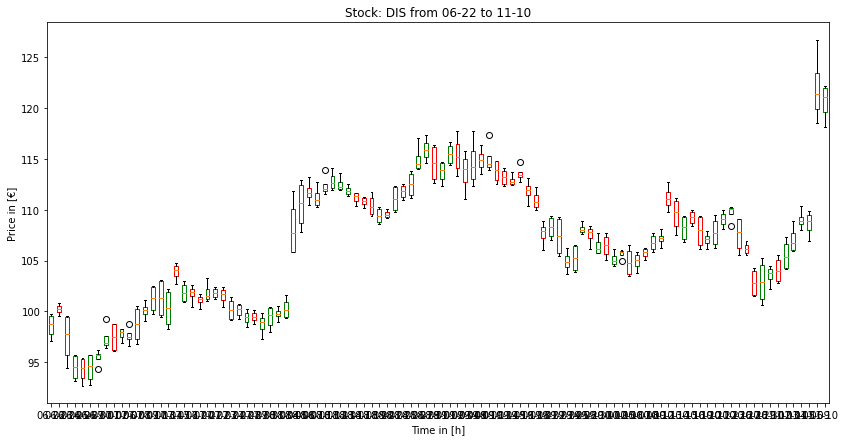

In [10]:
stock_boxplot_day = plt.boxplot(d.data[["1. open", "2. high", "3. low", "4. close"]], labels=timesteps)

for box in range(len(d.data.index)):
    if (d.data.iloc[box, 0] - d.data.iloc[box, 3]) >= 0:
        # Negative trend (low is lower or equal than open)
        plt.setp(stock_boxplot_day["boxes"][box], color = "red")
    else:
        # Positive trend (low is higher than open)
        plt.setp(stock_boxplot_day["boxes"][box], color = "green")
        
plt.title("Stock: {} from {} to {}".format(symbols[0], timesteps[0], timesteps[-1]))
plt.xlabel("Time in [h]")
plt.ylabel("Price in [€]")

plt.show()

# Plot volume

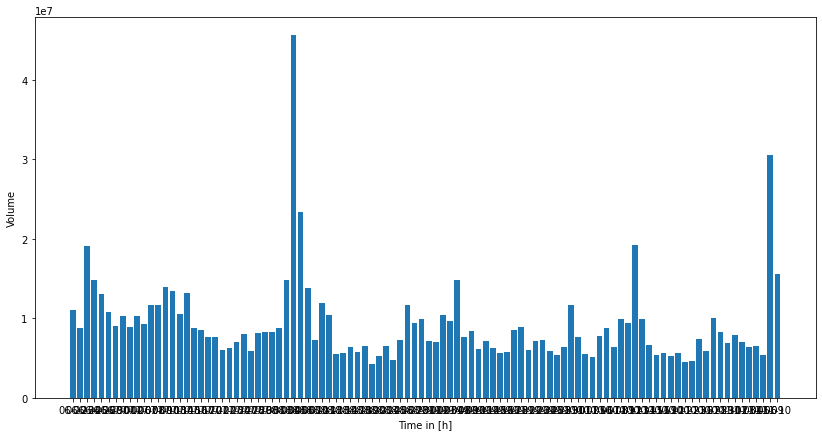

In [11]:
plt.bar(timesteps, d.data["5. volume"])
plt.xlabel("Time in [h]")
plt.ylabel("Volume")
plt.show()

# High mean, trend and low trend

See [Stackoverflow example](https://stackoverflow.com/questions/43769906/how-to-calculate-the-trendline-for-stock-price)

### High

In [12]:
x = list(range(len(timesteps)))

Calculate mean regression line and points

In [13]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, d.data["2. high"])
slope, intercept

(0.11790063006300634, 102.08151881188117)

In [14]:
d.data["6. high_trend"] = x
d.data["6. high_trend"]

date
2020-06-22     0
2020-06-23     1
2020-06-24     2
2020-06-25     3
2020-06-26     4
              ..
2020-11-04    95
2020-11-05    96
2020-11-06    97
2020-11-09    98
2020-11-10    99
Name: 6. high_trend, Length: 100, dtype: int64

In [15]:
high = d.data.loc[d.data['2. high'] > (slope * d.data["6. high_trend"] + intercept)]
high

,1. open,2. high,3. low,4. close,5. volume,6. high_trend
date,,,,,,
2020-07-15,104.39,104.78,102.73,103.76,13135341.57,16
2020-08-05,105.88,111.83,105.80,109.52,45590794.71,31
2020-08-06,108.96,112.97,107.80,112.27,23376240.99,32
2020-08-07,111.76,113.23,110.42,111.51,13807568.66,33
2020-08-10,111.35,112.70,110.27,110.53,7319903.02,34
2020-08-11,112.02,113.94,111.57,111.99,11916990.22,35
2020-08-12,112.14,114.14,111.99,113.11,10474763.99,36
2020-08-13,112.12,113.59,111.96,112.39,5551501.89,37
2020-08-14,111.58,112.50,111.35,112.02,5584939.07,38


In [16]:
slope, intercept, r_value, p_value, std_err = stats.linregress(list(range(len(high))), high["2. high"])
slope, intercept

(0.20188416988416985, 110.76202702702703)

In [17]:
d.data["6. high_trend"] = x
d.data["6. high_trend"] = d.data["6. high_trend"] * slope + intercept
d.data["6. high_trend"]

date
2020-06-22    110.762027
2020-06-23    110.963911
2020-06-24    111.165795
2020-06-25    111.367680
2020-06-26    111.569564
                 ...    
2020-11-04    129.941023
2020-11-05    130.142907
2020-11-06    130.344792
2020-11-09    130.546676
2020-11-10    130.748560
Name: 6. high_trend, Length: 100, dtype: float64

### Low

In [18]:
x = list(range(len(timesteps)))

Calculate mean regression line and points

In [19]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, d.data["3. low"])
slope, intercept

(0.11298985898589858, 99.75360198019801)

In [20]:
d.data["7. low_trend"] = x
d.data["7. low_trend"]

date
2020-06-22     0
2020-06-23     1
2020-06-24     2
2020-06-25     3
2020-06-26     4
              ..
2020-11-04    95
2020-11-05    96
2020-11-06    97
2020-11-09    98
2020-11-10    99
Name: 7. low_trend, Length: 100, dtype: int64

In [21]:
low = d.data.loc[d.data['3. low'] < (slope * d.data["7. low_trend"] + intercept)]
low

,1. open,2. high,3. low,4. close,5. volume,6. high_trend,7. low_trend
date,,,,,,,
2020-06-22,98.00,99.72,97.07,99.49,11024406.97,110.762027,0
2020-06-23,100.38,100.80,99.53,100.06,8736856.33,110.963911,1
2020-06-24,99.42,99.55,94.43,96.18,19075747.51,111.165795,2
2020-06-25,93.54,95.70,93.12,95.57,14780630.79,111.367680,3
2020-06-26,95.22,95.43,92.71,93.63,13093432.89,111.569564,4
...,...,...,...,...,...,...,...
2020-11-02,104.91,105.50,102.82,103.10,7883631.14,129.537255,93
2020-11-03,104.36,107.34,104.16,106.44,6990164.78,129.739139,94
2020-11-04,106.06,108.87,105.91,107.34,6422110.37,129.941023,95


In [22]:
slope, intercept, r_value, p_value, std_err = stats.linregress(list(range(len(low))), low["3. low"])
slope, intercept

(0.19943290272216765, 95.65503840245773)

In [23]:
d.data["7. low_trend"] = x
d.data["7. low_trend"] = d.data["7. low_trend"] * slope + intercept
d.data["7. low_trend"]

date
2020-06-22     95.655038
2020-06-23     95.854471
2020-06-24     96.053904
2020-06-25     96.253337
2020-06-26     96.452770
                 ...    
2020-11-04    114.601164
2020-11-05    114.800597
2020-11-06    115.000030
2020-11-09    115.199463
2020-11-10    115.398896
Name: 7. low_trend, Length: 100, dtype: float64

### Mean

In [24]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, d.data["4. close"])
slope, intercept

(0.11321206120612066, 101.09290297029702)

In [25]:
d.data["8. mean"] = x
d.data["8. mean"] = d.data["8. mean"] * slope + intercept
d.data["8. mean"]

date
2020-06-22    101.092903
2020-06-23    101.206115
2020-06-24    101.319327
2020-06-25    101.432539
2020-06-26    101.545751
                 ...    
2020-11-04    111.848049
2020-11-05    111.961261
2020-11-06    112.074473
2020-11-09    112.187685
2020-11-10    112.300897
Name: 8. mean, Length: 100, dtype: float64

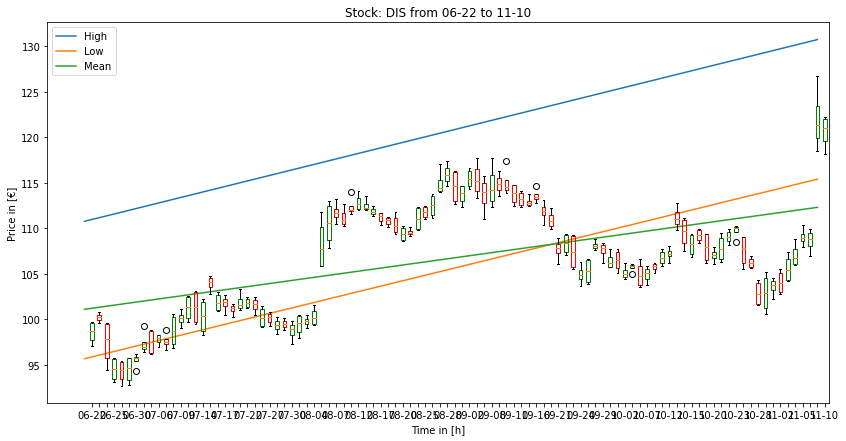

In [26]:
fig1, ax1 = plt.subplots()

plt.plot(timesteps, d.data["6. high_trend"], label='High')
plt.plot(timesteps, d.data["7. low_trend"], label='Low')
plt.plot(timesteps, d.data["8. mean"], label='Mean')

stock_boxplot_day = ax1.boxplot(d.data[["1. open", "2. high", "3. low", "4. close"]], labels=timesteps)

for box in range(len(d.data.index)):
    if (d.data.iloc[box, 0] - d.data.iloc[box, 3]) >= 0:
        # Negative trend (low is lower or equal than open)
        plt.setp(stock_boxplot_day["boxes"][box], color = "red")
    else:
        # Positive trend (low is higher than open)
        plt.setp(stock_boxplot_day["boxes"][box], color = "green")
        
plt.title("Stock: {} from {} to {}".format(symbols[0], timesteps[0], timesteps[-1]))
plt.xlabel("Time in [h]")
plt.ylabel("Price in [€]")
plt.legend()

for index, label in enumerate(ax1.xaxis.get_ticklabels()):
    if index % 3 != 0:
        label.set_visible(False)

plt.show()

# Moving Average

### Simple Moving Average (SMA)

In statistics, a moving average is a calculation used to analyze data points by creating a series of averages of different subsets of the full data set. In finance, a moving average (MA) is a stock indicator that is commonly used in technical analysis. The reason for calculating the moving average of a stock is to help smooth out the price data by creating a constantly updated average price.

Formula

$$
SMA = \frac{d_1, d_2, ..., d_n}{n}
$$

where $n$ is the number of time periods

In [27]:
d.data

,1. open,2. high,3. low,4. close,5. volume,6. high_trend,7. low_trend,8. mean
date,,,,,,,,
2020-06-22,98.00,99.72,97.07,99.49,11024406.97,110.762027,95.655038,101.092903
2020-06-23,100.38,100.80,99.53,100.06,8736856.33,110.963911,95.854471,101.206115
2020-06-24,99.42,99.55,94.43,96.18,19075747.51,111.165795,96.053904,101.319327
2020-06-25,93.54,95.70,93.12,95.57,14780630.79,111.367680,96.253337,101.432539
2020-06-26,95.22,95.43,92.71,93.63,13093432.89,111.569564,96.452770,101.545751
...,...,...,...,...,...,...,...,...
2020-11-04,106.06,108.87,105.91,107.34,6422110.37,129.941023,114.601164,111.848049
2020-11-05,108.81,110.38,107.96,108.96,6569482.49,130.142907,114.800597,111.961261
2020-11-06,108.35,109.89,106.95,109.39,5372208.20,130.344792,115.000030,112.074473


In [28]:
long_rolling = d.data["4. close"].rolling(window=15).mean()
long_rolling

date
2020-06-22           NaN
2020-06-23           NaN
2020-06-24           NaN
2020-06-25           NaN
2020-06-26           NaN
                 ...    
2020-11-04    106.633333
2020-11-05    106.610667
2020-11-06    106.648000
2020-11-09    107.698000
2020-11-10    108.680000
Name: 4. close, Length: 100, dtype: float64

### Exponential Moving Average

The exponential moving average is a type of moving average that gives more weight to recent prices in an attempt to make it more responsive to new information. To calculate an EMA, you must first compute the simple moving average (SMA) over a particular time period. Next, you must calculate the multiplier for weighting the EMA (referred to as the "smoothing factor"), which typically follows the formula: [2 ÷ (selected time period + 1)]. So, for a 20-day moving average, the multiplier would be [2/(20+1)]= 0.0952. Then you use the smoothing factor combined with the previous EMA to arrive at the current value. The EMA thus gives a higher weighting to recent prices, while the SMA assigns equal weighting to all values.

In [29]:
ema_short = d.data["4. close"].ewm(span=15, adjust=False).mean()

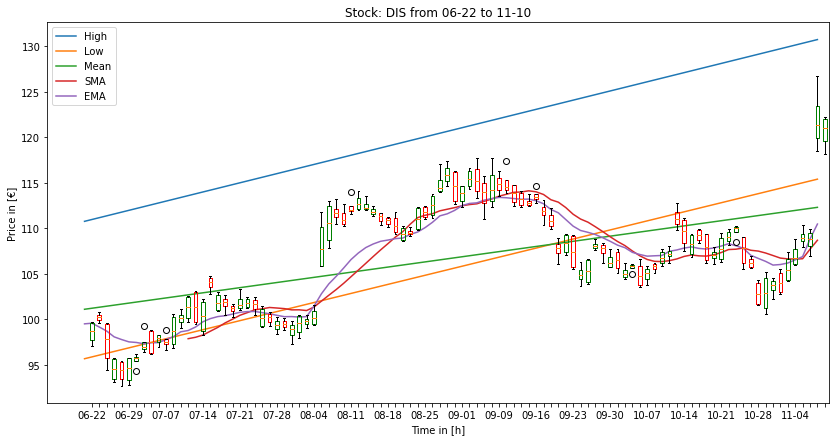

In [30]:
fig1, ax1 = plt.subplots()

plt.plot(timesteps, d.data["6. high_trend"], label='High')
plt.plot(timesteps, d.data["7. low_trend"], label='Low')
plt.plot(timesteps, d.data["8. mean"], label='Mean')
plt.plot(timesteps, long_rolling, label="SMA")
plt.plot(timesteps, ema_short, label="EMA")

stock_boxplot_day = ax1.boxplot(d.data[["1. open", "2. high", "3. low", "4. close"]], labels=timesteps)

for box in range(len(d.data.index)):
    if (d.data.iloc[box, 0] - d.data.iloc[box, 3]) >= 0:
        # Negative trend (low is lower or equal than open)
        plt.setp(stock_boxplot_day["boxes"][box], color = "red")
    else:
        # Positive trend (low is higher than open)
        plt.setp(stock_boxplot_day["boxes"][box], color = "green")
        
plt.title("Stock: {} from {} to {}".format(symbols[0], timesteps[0], timesteps[-1]))
plt.xlabel("Time in [h]")
plt.ylabel("Price in [€]")
plt.legend()

for index, label in enumerate(ax1.xaxis.get_ticklabels()):
    if index % 5 != 0:
        label.set_visible(False)

plt.show()

### TODO: Future calculations

[Ressource](https://www.learndatasci.com/tutorials/python-finance-part-3-moving-average-trading-strategy/)

* When the price timeseries p(t) crosses the EMA timeseries e(t) from below, we will close any existing short position and go long (buy) one unit of the asset.
* When the price timeseries p(t) crosses the EMA timeseries e(t) from above, we will close any existing long position and go short (sell) one unit of the asset.